In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,make_scorer
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
%matplotlib inline

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Here, Outcome is a target/dependent variable and others are predictor/independent variables.

In [4]:
data.shape

(768, 9)

In [5]:
data.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Some of the variables (Glucose,BloodPressure,SkinThickness,Insulin,BMI) have 0 as minimum value and that is not possible.

These variables have missing values as 0 present in this dataset. So, marking them as missing values by replacing it by NaN.

In [10]:
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

There are 5 variables having missing values. Now, filling missing values in these variables by specific value.

In [12]:
data['Glucose'].fillna(data['Glucose'].median(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].mean(), inplace = True)

In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now the missing values are now filled by specified methods.

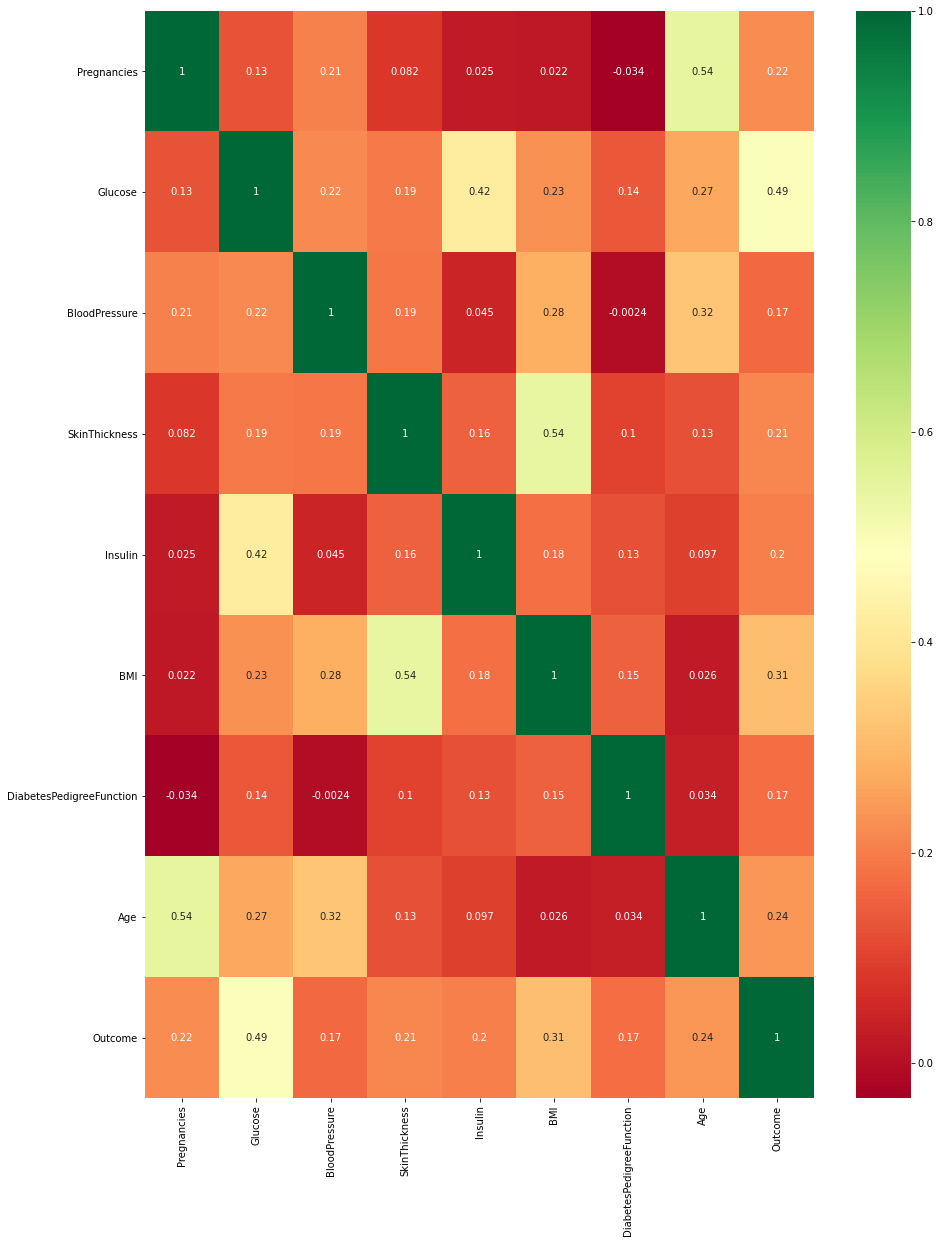

In [14]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,20))

# Plotting heat map

g = sns.heatmap(data[top_corr_features].corr(),annot = True,cmap = "RdYlGn")

In [51]:
# Finding pairwise correlation of all columns

data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021565,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.230862,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281319,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543162,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.021565,0.230862,0.281319,0.543162,0.180170,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.311924,0.173844,0.238356,1.000000


In [52]:
# Getting unique values 

data['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [53]:
# Finding counts of unique values and sorting it in ascending order

data['Pregnancies'].value_counts().sort_values()

17      1
15      1
14      2
12      9
13     10
11     11
10     24
9      28
8      38
7      45
6      50
5      57
4      68
3      75
2     103
0     111
1     135
Name: Pregnancies, dtype: int64

# Grouping predictor variables by target variable

In [18]:
data.groupby("Outcome")[["Pregnancies","Glucose","BloodPressure"]].agg(['max','min','mean'])

Pregnancies               Glucose                   BloodPressure  \
                max min      mean     max   min        mean           max   
Outcome                                                                     
0                13   0  3.298000   197.0  44.0  110.682000         122.0   
1                17   0  4.865672   199.0  78.0  142.130597         114.0   

                          
          min       mean  
Outcome                   
0        24.0  70.920000  
1        30.0  75.123134

In [19]:
data.groupby("Outcome")[["SkinThickness","Insulin","BMI","Age"]].agg(['max','min','mean'])

SkinThickness                 Insulin                     BMI        \
                  max  min       mean     max   min        mean   max   min   
Outcome                                                                       
0                60.0  7.0  27.726000   744.0  15.0  127.792000  57.3  18.2   
1                99.0  7.0  31.686567   846.0  14.0  164.701493  67.1  22.9   

                   Age                 
              mean max min       mean  
Outcome                                
0        30.888434  81  21  31.190000  
1        35.384757  70  21  37.067164

In [54]:
# Finding counts of unique values 

data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

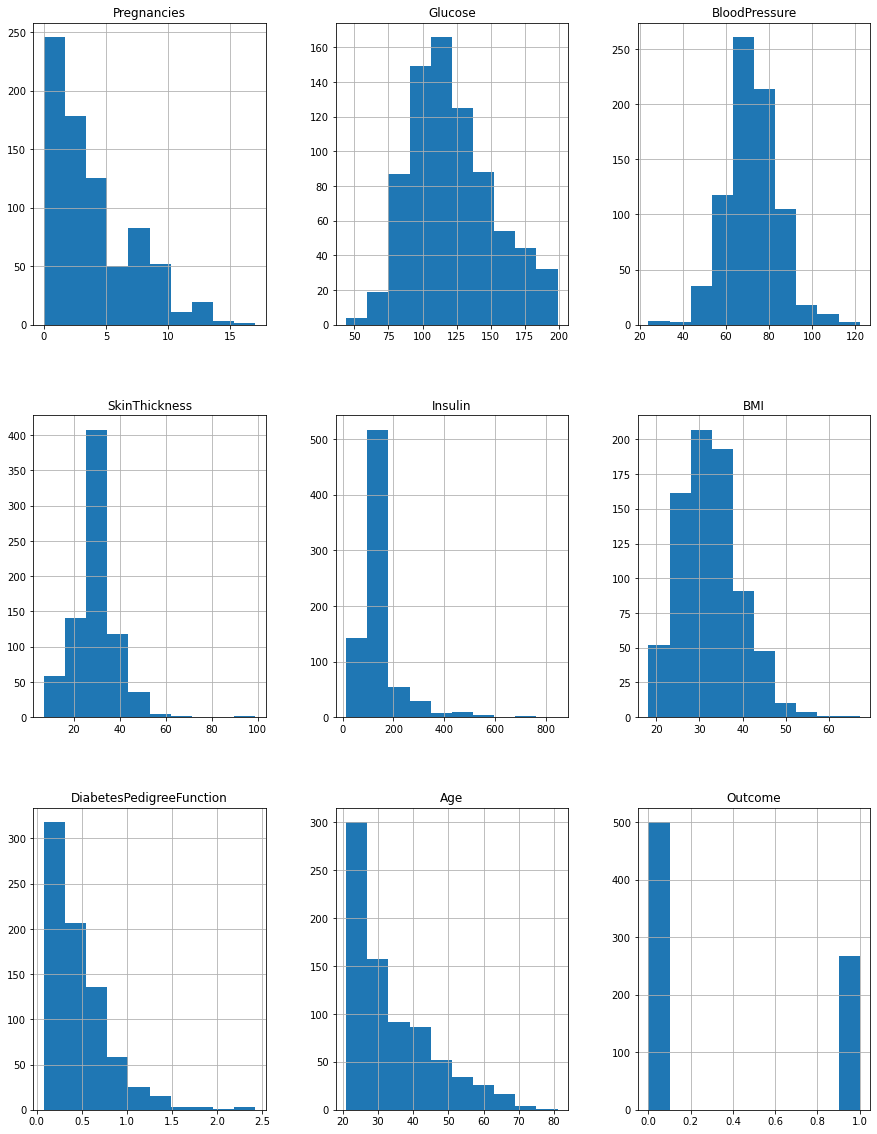

In [55]:
# Plotting histogram of dataframe

p = data.hist(figsize = (15,20))

## Creating Predictor Matrix

In [22]:
X = data.drop('Outcome',axis = 1)

In [23]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


## Target variable

In [24]:
y = data['Outcome']

In [56]:
# Getting first few observations of target variable

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [57]:
# Splitting the matrices into random train & test subsets where test data contains 25% data and rest considered as training data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 200)

In [58]:
# Getting dimensions of train & test subsets

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [28]:
clf = RandomForestClassifier(oob_score = True,n_jobs = -1,random_state = 100)
clf

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=100)

Cross validation score should between 0 and 1 and as high as possible. Here cross validation has been performed to find how well model is performing in terms of F1 score.

In [29]:
# Performing K-fold cross validation with 5 folds 

scores = cross_val_score(clf,X_train,y_train,cv = 5,scoring = "f1_macro")
scores.mean()

0.7139192769714777

In [30]:
# Building a forest of trees from training set

clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=100)

In [31]:
# Predicting on classifier created

train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [32]:
# Finding F1 score of training and testing sets 

print("The training F1 score is: ",f1_score(train_pred,y_train))
print("The testing F1 score is :",f1_score(test_pred,y_test))

The training F1 score is:  1.0
The testing F1 score is : 0.6942148760330579


In [33]:
#  Tuning hyperparameters

parameters = {
             "max_depth":[2,3,4],
             "n_estimators":[100,104,106],
             "min_samples_split":[3,4,5],
             "min_samples_leaf":[4,8,9]
             }

scorer = make_scorer(f1_score)

In [34]:
# Using Randomized Search CV to find best optimal hyperparameter that best describe a classifier

clf1 = RandomizedSearchCV(clf,parameters,scoring = scorer)

# Fitting the model

clf1.fit(X_train,y_train)

# Getting best estimator having high score

best_clf_random = clf1.best_estimator_
best_clf_random

RandomForestClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=4,
                       n_estimators=106, n_jobs=-1, oob_score=True,
                       random_state=100)

In [35]:
# Again, finding cross validation score

scores = cross_val_score(best_clf_random,X_train,y_train,cv = 5,scoring = "f1_macro")
scores.mean()

0.6993389935821842

In [36]:
# Fitting the best estimator

best_clf_random.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=4,
                       n_estimators=106, n_jobs=-1, oob_score=True,
                       random_state=100)

In [37]:
# Getting first estimator

best_clf_random.estimators_[0]

DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=8,
                       min_samples_split=4, random_state=186422792)

In [38]:
# Predicting on best estimator

train_pred = best_clf_random.predict(X_train)
test_pred = best_clf_random.predict(X_test)

In [39]:
# Finding the F1 score of training & testing sets

print("The training F1 score is: ",f1_score(train_pred,y_train))
print("The testing F1 score is :",f1_score(test_pred,y_test))

The training F1 score is:  0.675603217158177
The testing F1 score is : 0.689655172413793


In [40]:
# Getting accuracy score 

accuracy_score(y_test,test_pred)

0.8125

In [41]:
# Computing ROC AUC from prediction scores

roc_auc_score(y_test,best_clf_random.predict_proba(X_test)[:,1])

0.8840321141837646

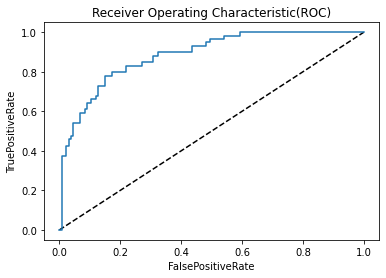

In [50]:
# Plotting ROC curve

fpr,tpr,thresholds = roc_curve(y_test,best_clf_random.predict_proba(X_test)[:,1])

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('FalsePositiveRate')
plt.ylabel('TruePositiveRate')
plt.title("Receiver Operating Characteristic(ROC)")
plt.show()

In [43]:
# Computing confusion matrix

pd.crosstab(y_test,test_pred,rownames = ['True'],colnames = ['Predicted'],margins = True)

Predicted,0,1,All
True,,,
0,116,17,133
1,19,40,59
All,135,57,192


Text(33.0, 0.5, 'Actual Label')

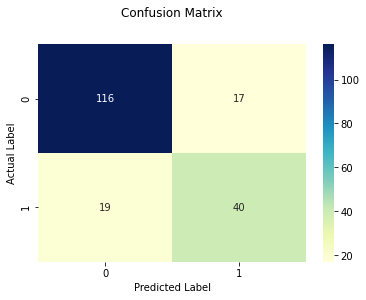

In [44]:
# Plotting confusion matrix

cnf_matrix = confusion_matrix(y_test,test_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "YlGnBu",fmt = 'g')
plt.title("Confusion Matrix",y = 1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [45]:
# Computing the precision

precision_score(y_test,test_pred)

0.7017543859649122